<a href="https://colab.research.google.com/github/DevanshD3/Quant-Wing-2020/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
 import numpy as np
 import pandas as pd
 #used to grab the stock prices, with yahoo
 import pandas_datareader as web
 from datetime import datetime
 #to visualize the results
 import matplotlib.pyplot as plt
 import seaborn

In [68]:
,#select start date for correlation window as well as list of tickers
start = datetime(2020, 1, 1)
symbols_list = ['AAPL', 'FB', 'AMZN', 'GOOGL', 'MSFT', 'GOOG', 'JNJ', 'V', 'PG', 'JPM', 'UNH', 'MA', 'INTC', 'VZ','HD','T','PFE','MRK','PEP','WMT']

In [69]:
#array to store prices
symbols=[]

#pull price using iex for each symbol in list defined above
for ticker in symbols_list: 
    r = web.DataReader(ticker, 'yahoo', start)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.head()

,Date,Close,Symbol
0,2020-01-02,300.350006,AAPL
1,2020-01-03,297.429993,AAPL
2,2020-01-06,299.799988,AAPL
3,2020-01-07,298.390015,AAPL
4,2020-01-08,303.190002,AAPL


In [70]:
df_pivot = df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()

Symbol,Date,AAPL,AMZN,FB,GOOG,GOOGL,HD,INTC,JNJ,JPM,MA,MRK,MSFT,PEP,PFE,PG,T,UNH,V,VZ,WMT
0,2020-01-02,300.350006,1898.010010,209.779999,1367.369995,1368.680054,219.660004,60.840000,145.970001,141.089996,303.390015,92.040001,160.619995,135.820007,39.139999,123.410004,38.860001,292.500000,191.119995,61.049999,118.940002
1,2020-01-03,297.429993,1874.969971,208.669998,1360.660034,1361.520020,218.929993,60.099998,144.279999,138.339996,300.429993,91.250000,158.619995,135.630005,38.930000,122.580002,39.060001,289.540009,189.600006,60.400002,117.889999
2,2020-01-06,299.799988,1902.880005,212.600006,1394.209961,1397.810059,219.960007,59.930000,144.100006,138.229996,301.230011,91.639999,159.029999,136.149994,38.880001,122.750000,39.099998,291.549988,189.190002,60.270000,117.650002
3,2020-01-07,298.390015,1906.859985,213.059998,1393.339966,1395.109985,218.520004,58.930000,144.979996,135.880005,300.209991,89.199997,157.580002,134.009995,38.750000,121.989998,39.250000,289.790009,188.690002,59.599998,116.559998
4,2020-01-08,303.190002,1891.969971,215.220001,1404.319946,1405.040039,221.789993,58.970001,144.960007,136.940002,305.100006,88.599998,160.089996,134.699997,39.060001,122.510002,39.369999,295.899994,191.919998,59.709999,116.160004


In [71]:
corr_df = df_pivot.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
# del (corr_df.index.name)
corr_df.head(10)

Symbol,AAPL,AMZN,FB,GOOG,GOOGL,HD,INTC,JNJ,JPM,MA,MRK,MSFT,PEP,PFE,PG,T,UNH,V,VZ,WMT
Symbol,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.850393,0.916920,0.807872,0.812745,0.891432,-0.034466,0.451935,0.026086,0.665848,0.143276,0.909445,0.403837,0.351381,0.704399,-0.142876,0.765982,0.656002,0.230863,0.553691
AMZN,0.850393,1.000000,0.740833,0.563846,0.569653,0.718064,-0.159224,0.325290,-0.417966,0.284614,-0.219123,0.930076,0.094058,0.111470,0.403599,-0.570512,0.598121,0.307659,-0.096987,0.772050
FB,0.916920,0.740833,1.000000,0.905620,0.910201,0.930530,0.228581,0.563016,0.172119,0.768534,0.269390,0.857719,0.473673,0.482233,0.622672,-0.018851,0.851355,0.794056,0.324435,0.447411
GOOG,0.807872,0.563846,0.905620,1.000000,0.999749,0.914490,0.443183,0.690800,0.447586,0.906230,0.449183,0.772221,0.728006,0.585416,0.734349,0.273944,0.856758,0.930511,0.498504,0.328854
GOOGL,0.812745,0.569653,0.910201,0.999749,1.000000,0.917319,0.437523,0.686163,0.441876,0.905630,0.445333,0.776461,0.722515,0.583711,0.732340,0.267623,0.858001,0.929786,0.493080,0.330284
HD,0.891432,0.718064,0.930530,0.914490,0.917319,1.000000,0.245648,0.608777,0.195524,0.811981,0.259178,0.867350,0.594634,0.476473,0.656663,0.031508,0.879827,0.831196,0.342712,0.442590
INTC,-0.034466,-0.159224,0.228581,0.443183,0.437523,0.245648,1.000000,0.558830,0.544549,0.499496,0.474618,0.113860,0.585799,0.361855,0.151144,0.467071,0.377307,0.563373,0.464993,-0.123335
JNJ,0.451935,0.325290,0.563016,0.690800,0.686163,0.608777,0.558830,1.000000,0.355490,0.626902,0.624042,0.513533,0.809477,0.808371,0.681189,0.252234,0.788700,0.640081,0.726586,0.501331
JPM,0.026086,-0.417966,0.172119,0.447586,0.441876,0.195524,0.544549,0.355490,1.000000,0.686663,0.786240,-0.148736,0.687958,0.485127,0.491675,0.945803,0.268048,0.640076,0.721655,-0.445985


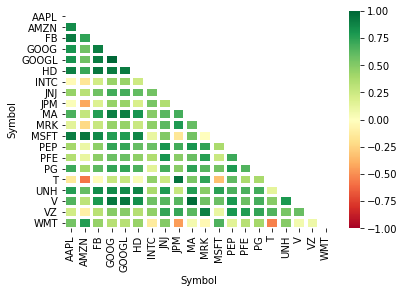

In [72]:
#take the bottom triangle since it repeats itself
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
#generate plot
seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [90]:
corr=[]
# this for-loop prints the 2nd largest covariance(the largest is 1 OB) of each ticker
for ticker in symbols_list:
  corr.append(corr_df.nlargest(2, ticker , keep='first')[ticker][1])
corr = np.array(corr)
sort_index = np.argsort(corr) 
print("The tickers of the least covaried stocks are")
for i in range(5):
  print(symbols_list[sort_index[i]])

The tickers of the least covaried stocks are
INTC
WMT
PG
PFE
JNJ
